# Baseline Model

## Table of Contents
1. [Model Choice](#model-choice)
2. [Feature Selection](#feature-selection)
3. [Implementation](#implementation)
4. [Evaluation](#evaluation)


In [1]:
from math import nan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import scikeras

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import MinMaxScaler

## Model Choice

We tried a linear regression model and a random forest model because both seemed suitable for our task (predicting the production with 1-2 parameters) In the end we decided on the linear regression model, because it seemed to work best.


## Feature Selection

As features, we selected the average temperature and the Sunshine duration, we know there is a linear relationship between the  solar radiation and the production, bbut the solar radiation is also harder to predict. So we decided to use two different parameters, which should be closely related to the production, which are easier to predict



In [ ]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('../Dobersdorf/Dobersdorf_all_cut_final.csv', sep=",", decimal=",", header=0)


# Feature selection
# Example: Selecting only two features for a simple baseline model
X = df[['Sun','Tavg']]
y = df['Produktion(kWH)']
#n_y= y/100
#n_x= X/100
scaler = MinMaxScaler()
n_x = scaler.fit_transform(X)
y = np.array(y).reshape(-1, 1)
n_y = scaler.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(n_x, n_y, test_size=0.2,shuffle=False)

###Dobersdorf
#plt.scatter(n_x['Sun'], n_y)
#plt.xlabel('Sunlight duration (h/100)')
#plt.ylabel('production (kWh/100)')
#plt.title('Sunlight duration vs. production - Dobersdorf ')
#plt.show()

###here we had to exclude missing values
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test= np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

print("X nan:", np.isnan(X_train).any())
print("y nan:", np.isnan(y_train).any())
print("X inf:", np.isinf(X_train).any())
print("y inf:", np.isinf(y_train).any())

print("X nan:", np.isnan(X_test).any())
print("y nan:", np.isnan(y_test).any())
print("X inf:", np.isinf(X_test).any())
print("y inf:", np.isinf(y_test).any())

X nan: False
y nan: False
X inf: False
y inf: False
X nan: False
y nan: False
X inf: False
y inf: False


In [11]:
print(X_train.shape)
print(y_train.shape)

(732, 2)
(732, 1)


## Implementation

[Implement your baseline model here.]



In [9]:
model = keras.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(2),
    keras.layers.Dense(1, activation="relu")
])


# TODO Compile the model
model.compile(
#loss= keras.losses.MeanSquaredError(),
loss= keras.losses.MeanAbsoluteError(),
optimizer= keras.optimizers.Adam(learning_rate=0.001),
metrics=["mse"]
               )

# Train final model on all training data
model.fit(X_train, y_train, batch_size=16, epochs=50) #, validation_split=0.2)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1930 - mse: 0.0517   
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.1361 - mse: 0.0263
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.1250 - mse: 0.0237
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.1183 - mse: 0.0221
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.1133 - mse: 0.0205
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.1097 - mse: 0.0197
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.1083 - mse: 0.0192
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.1072 - mse: 0.0187
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.1049 - mse: 0.0187
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.1040 - mse: 0.0182
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.1033 - mse: 0.0180
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.1026 - mse: 0.0177
Epoch 13/50
46/46 ━━━━━━

In [14]:
# Evaluate the baseline model
model.evaluate(X_train,y_train)

# TODO Make predictions
forecast = model.predict(X_test)
mse = mean_squared_error(y_test, forecast)
print("Mean squared error is:", mse)
mae= mean_absolute_error(y_test, forecast)
print("Mean absolute error is:",mae)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0983 - mse: 0.0166 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean squared error is: 0.012028564668291594
Mean absolute error is: 0.08512680174913381


In [15]:
mae/np.max(y_test)*100

np.float64(9.590794715321403)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0866 - mae: 0.0866 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean squared error is: 0.012164499714318842
Mean absolute error is: 0.08924255925981252

New wo cross validation
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0969 - mae: 0.0969 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.01168494660734097

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2875 - mae: 0.2875 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.240025567765164

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1337 - mae: 0.1337 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
0.034788547555453124

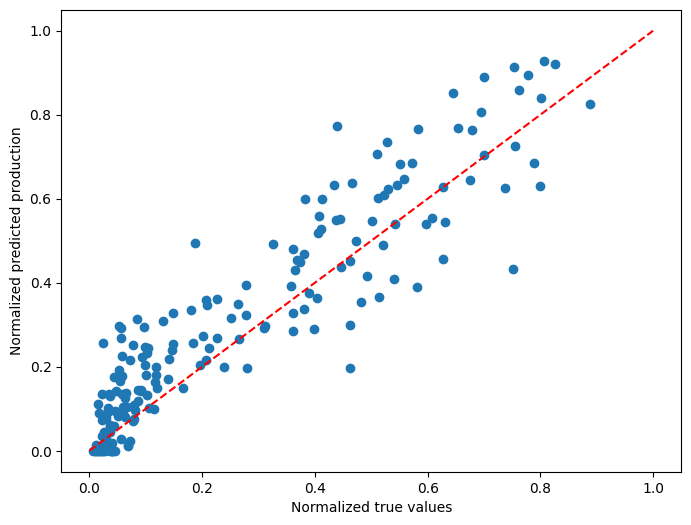

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, forecast)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('Normalized true values')
plt.ylabel('Normalized predicted production')
#plt.title('True vs. Predicted Production - Dobersdorf')
#np.save('Dobersdorf_baseline_true_vs_predicted.npy', np.array([y_test, forecast]))
#plt.savefig('Dobersdorf_baseline_true_vs_predicted.png', dpi=300)
plt.show()